# Part I - Ford GoBike System Data exploration
## by Raoul Batcho

## Introduction
> Ford GoBike System dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Please, find the dataset [here](https://www.google.com/url?q=https://video.udacity-data.com/topher/2020/October/5f91cf38_201902-fordgobike-tripdata/201902-fordgobike-tripdata.csv&sa=D&source=editors&ust=1660451729532140&usg=AOvVaw3yhob-Nn1itqcm2PrBE3vT)


## Preliminary Wrangling


In [37]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [38]:
# load dataset
df=pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [39]:
# Check dataset information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [40]:
# Check duplicate rows
df[df.duplicated(keep=False)==True]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip


### What is the structure of your dataset?

> the dataset has 16 columns and 183412 rows and records following information about 
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)


### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring what features are best in finding when are most trips taken in terms of duration, How long does the average trip take? Does it depend on if a user is a subscriber or customer or male or female?

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The most interesting features in the dataset that are important to support my investigation are 'duration_sec', 'start_time',	'end_time', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'user_type','member_birth_year', 'member_gender', 'bike_share_for_all_trip'.  

In [41]:
# drop rows having any null value 
df.dropna(axis=0, inplace=True)

In [42]:
# Drop duplicates and reset the index
df.drop_duplicates(inplace=True)

df.reset_index(drop=True, inplace=True)

In [43]:
# change the type of start_time and end_time columns to datetime
df.start_time=pd.to_datetime(df.start_time)
df.end_time=pd.to_datetime(df.end_time)

# change the type of start_station_id and _station_id columns to int then str
df.start_station_id=df.start_station_id.astype('int').astype('str')
df.end_station_id=df.end_station_id.astype('int').astype('str')

# change the type of bike_id to str
df.bike_id=df.bike_id.astype('str')
df.member_birth_year=df.member_birth_year.astype('int').astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null object
member_birth_year          174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(4), int64(1), object(9)
memory usag

In [44]:
# Extract day, month, year from start_time and end_time columns

df['start_day']=df['start_time'].dt.strftime('%a')
df['start_hour']=df['start_time'].dt.strftime('%H')

df['end_day']=df.end_time.dt.strftime('%a')
df['end_hour']=df['end_time'].dt.strftime('%H')

# drop 'start_time','end_time', bike_id columns since they are useless for our analysis
df=df.drop(['start_time','end_time','bike_id'], axis=1)

df.head()

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984,Male,No,Thu,17,Fri,08
1,61854,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972,Male,No,Thu,12,Fri,05
2,36490,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989,Other,No,Thu,17,Fri,04
3,1585,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974,Male,Yes,Thu,23,Fri,00
4,1793,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,Subscriber,1959,Male,No,Thu,23,Fri,00


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 17 columns):
duration_sec               174952 non-null int64
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null object
member_birth_year          174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_hour                 174952 non-null object
end_day                    174952 non-null object
end_hour                   174952 non-null object
dtypes: float64(4), int64(1), object

In [46]:
# Create an id column to serve as id for each row
df['trip_id']=df.index.astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null object
member_birth_year          174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_hour                 174952 non-null object
end_day                    174952 non-null object
end_hour                   174952 non-null object
trip_id                    174952 no

In [47]:
# move the id column to the first column position 
df_cols=list(df.columns)
df_cols.remove('trip_id')
df_cols.insert(0,'trip_id')
df=df[df_cols]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174952 entries, 0 to 174951
Data columns (total 18 columns):
trip_id                    174952 non-null object
duration_sec               174952 non-null int64
start_station_id           174952 non-null object
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null object
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
user_type                  174952 non-null object
member_birth_year          174952 non-null object
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
start_day                  174952 non-null object
start_hour                 174952 non-null object
end_day                    174952 non-null object
end_hour                   174952 no

In [48]:
df.head()

,trip_id,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour
0,0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,-122.402923,Customer,1984,Male,No,Thu,17,Fri,08
1,1,61854,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,Customer,1972,Male,No,Thu,12,Fri,05
2,2,36490,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,-122.444293,Subscriber,1989,Other,No,Thu,17,Fri,04
3,3,1585,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,-122.248780,Subscriber,1974,Male,Yes,Thu,23,Fri,00
4,4,1793,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,-122.405950,Subscriber,1959,Male,No,Thu,23,Fri,00


In [49]:
# Create column containing the difference of latitude and difference of longitude for each row
df['diff_latitude']=df['start_station_latitude'].sub(df['end_station_latitude'], axis = 0).abs()
df['diff_longitude']=df['start_station_longitude'].sub(df['end_station_longitude'], axis = 0).abs()
df=df.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis=1)
df.head()

,trip_id,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_hour,end_day,end_hour,diff_latitude,diff_longitude
0,0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,Customer,1984,Male,No,Thu,17,Fri,08,0.004606,0.002112
1,1,61854,86,Market St at Dolores St,3,Powell St BART Station (Market St at 4th St),Customer,1972,Male,No,Thu,12,Fri,05,0.017070,0.021921
2,2,36490,375,Grove St at Masonic Ave,70,Central Ave at Fell St,Subscriber,1989,Other,No,Thu,17,Fri,04,0.001525,0.002253
3,3,1585,7,Frank H Ogawa Plaza,222,10th Ave at E 15th St,Subscriber,1974,Male,Yes,Thu,23,Fri,00,0.011848,0.022958
4,4,1793,93,4th St at Mission Bay Blvd S,323,Broadway at Kearny,Subscriber,1959,Male,No,Thu,23,Fri,00,0.027606,0.014752


In [50]:
df.to_csv('df_clean.csv')

In [51]:
mean_duration=df.duration_sec.mean()
mean_duration

704.0027436096758

## Univariate Exploration

> In this section, we will investigate distributions of individual variables, take a deeper look to clean things up
and prepare to look at relationships between variables.


### Question 1: What is the number of trip per week day  ?

> ### Visualization 1:

In [52]:
def plot_func (plt, xlabel, ylabel, title) :
    
    """This function takes 4 arguments:
       The plt object, the x axis label, the y axis label,
        and the title of the graph. 
        The function returns a plot with all the values entered as arguments"""
    
    plt.xlabel(xlabel, fontsize=20)
    plt.ylabel(ylabel, fontsize=20)
    plt.title(title, fontsize=20)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()


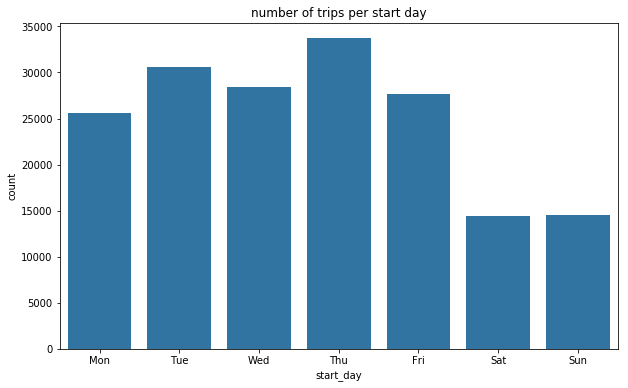

In [53]:
# Countplot bike usage based on weekday

day_name = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
base_color = sb.color_palette()[0]

plt.figure(figsize=(10,6))
plt.title('number of trips per start day')

sb.countplot(data=df, x='start_day', order=day_name,  color=base_color);

> ### Observation 1
>> The visualization 1 shows that the highest number of trip are registered during working days and less during weedend.

### Question 2: In which hour the most number of trip has started?

### Visualisation 2

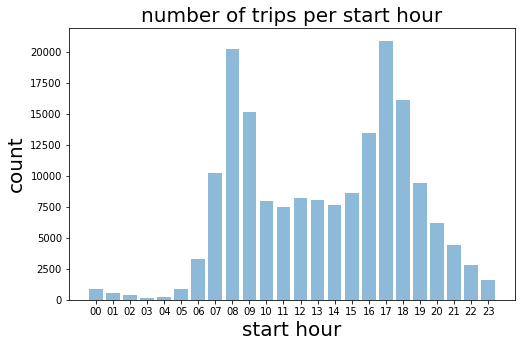

In [54]:
x=df.start_hour.value_counts().index
y=df.start_hour.value_counts().values

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, y, alpha=0.5)
plot_func(plt, 'start hour', 'count', 'number of trips per start hour')


> ### Observation 2:
>> The visualization 2 shows that most of trips start at 8 O'clock and 17 O'clock.

### Question 3: In which hour the most number of trip has ended?

> ### Visualization 3:

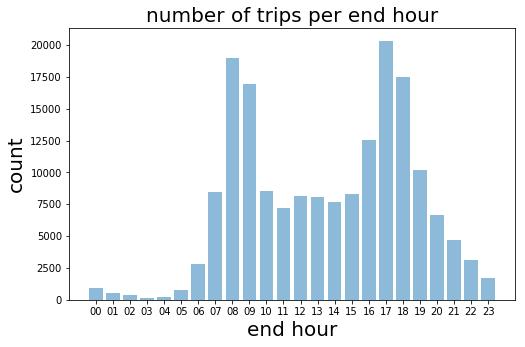

In [55]:
x=df.end_hour.value_counts().index
y=df.end_hour.value_counts().values

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x, y, alpha=0.5)

plot_func(plt, 'end hour', 'count', 'number of trips per end hour')

> ### Observation 3 :
>> The visualization 3 shows that most of trips end at 8 O'clock and 17 O'clock.

### Question 4: How many members by birth year ?

> ### Visualization 4:

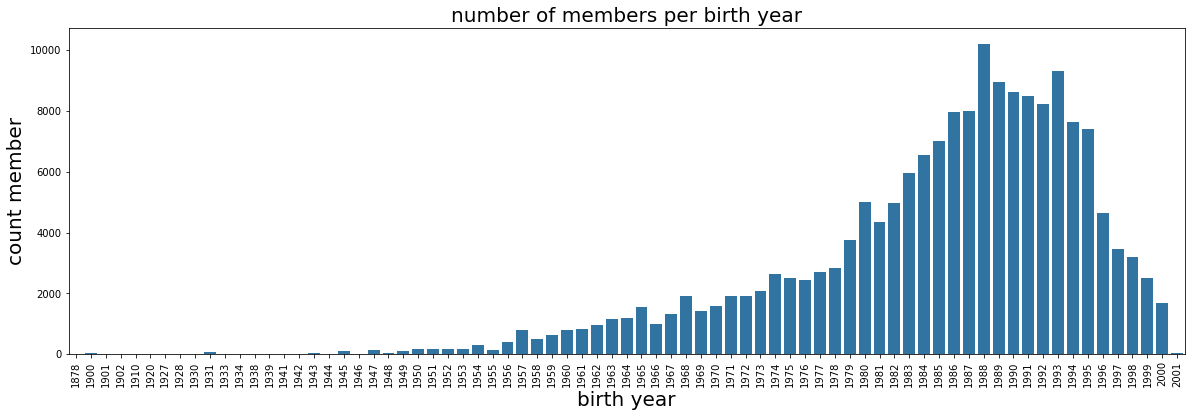

In [56]:
plt.figure(figsize=(20,6))
sb.countplot(data=df, x='member_birth_year', color=sb.color_palette()[0])
plt.xticks(rotation='vertical')
plot_func(plt, 'birth year', 'count member', 'number of members per birth year')



In [57]:
def plot_func_2 (plt, xlabel, ylabel, title) :
    
    """This function takes 4 arguments:
    The plt object, the x axis label, the y axis label
    and the title of the graph. the function returns a plot with all the variables entered in argument"""
    
    plt.xlabel(xlabel, fontsize=50)
    plt.ylabel(ylabel, fontsize=50)
    plt.title(title, fontsize=50)
    plt.xticks(rotation='vertical', fontsize=40)
    plt.yticks(fontsize=40)
    plt.show()

#### Closer look to the half left side of the graph

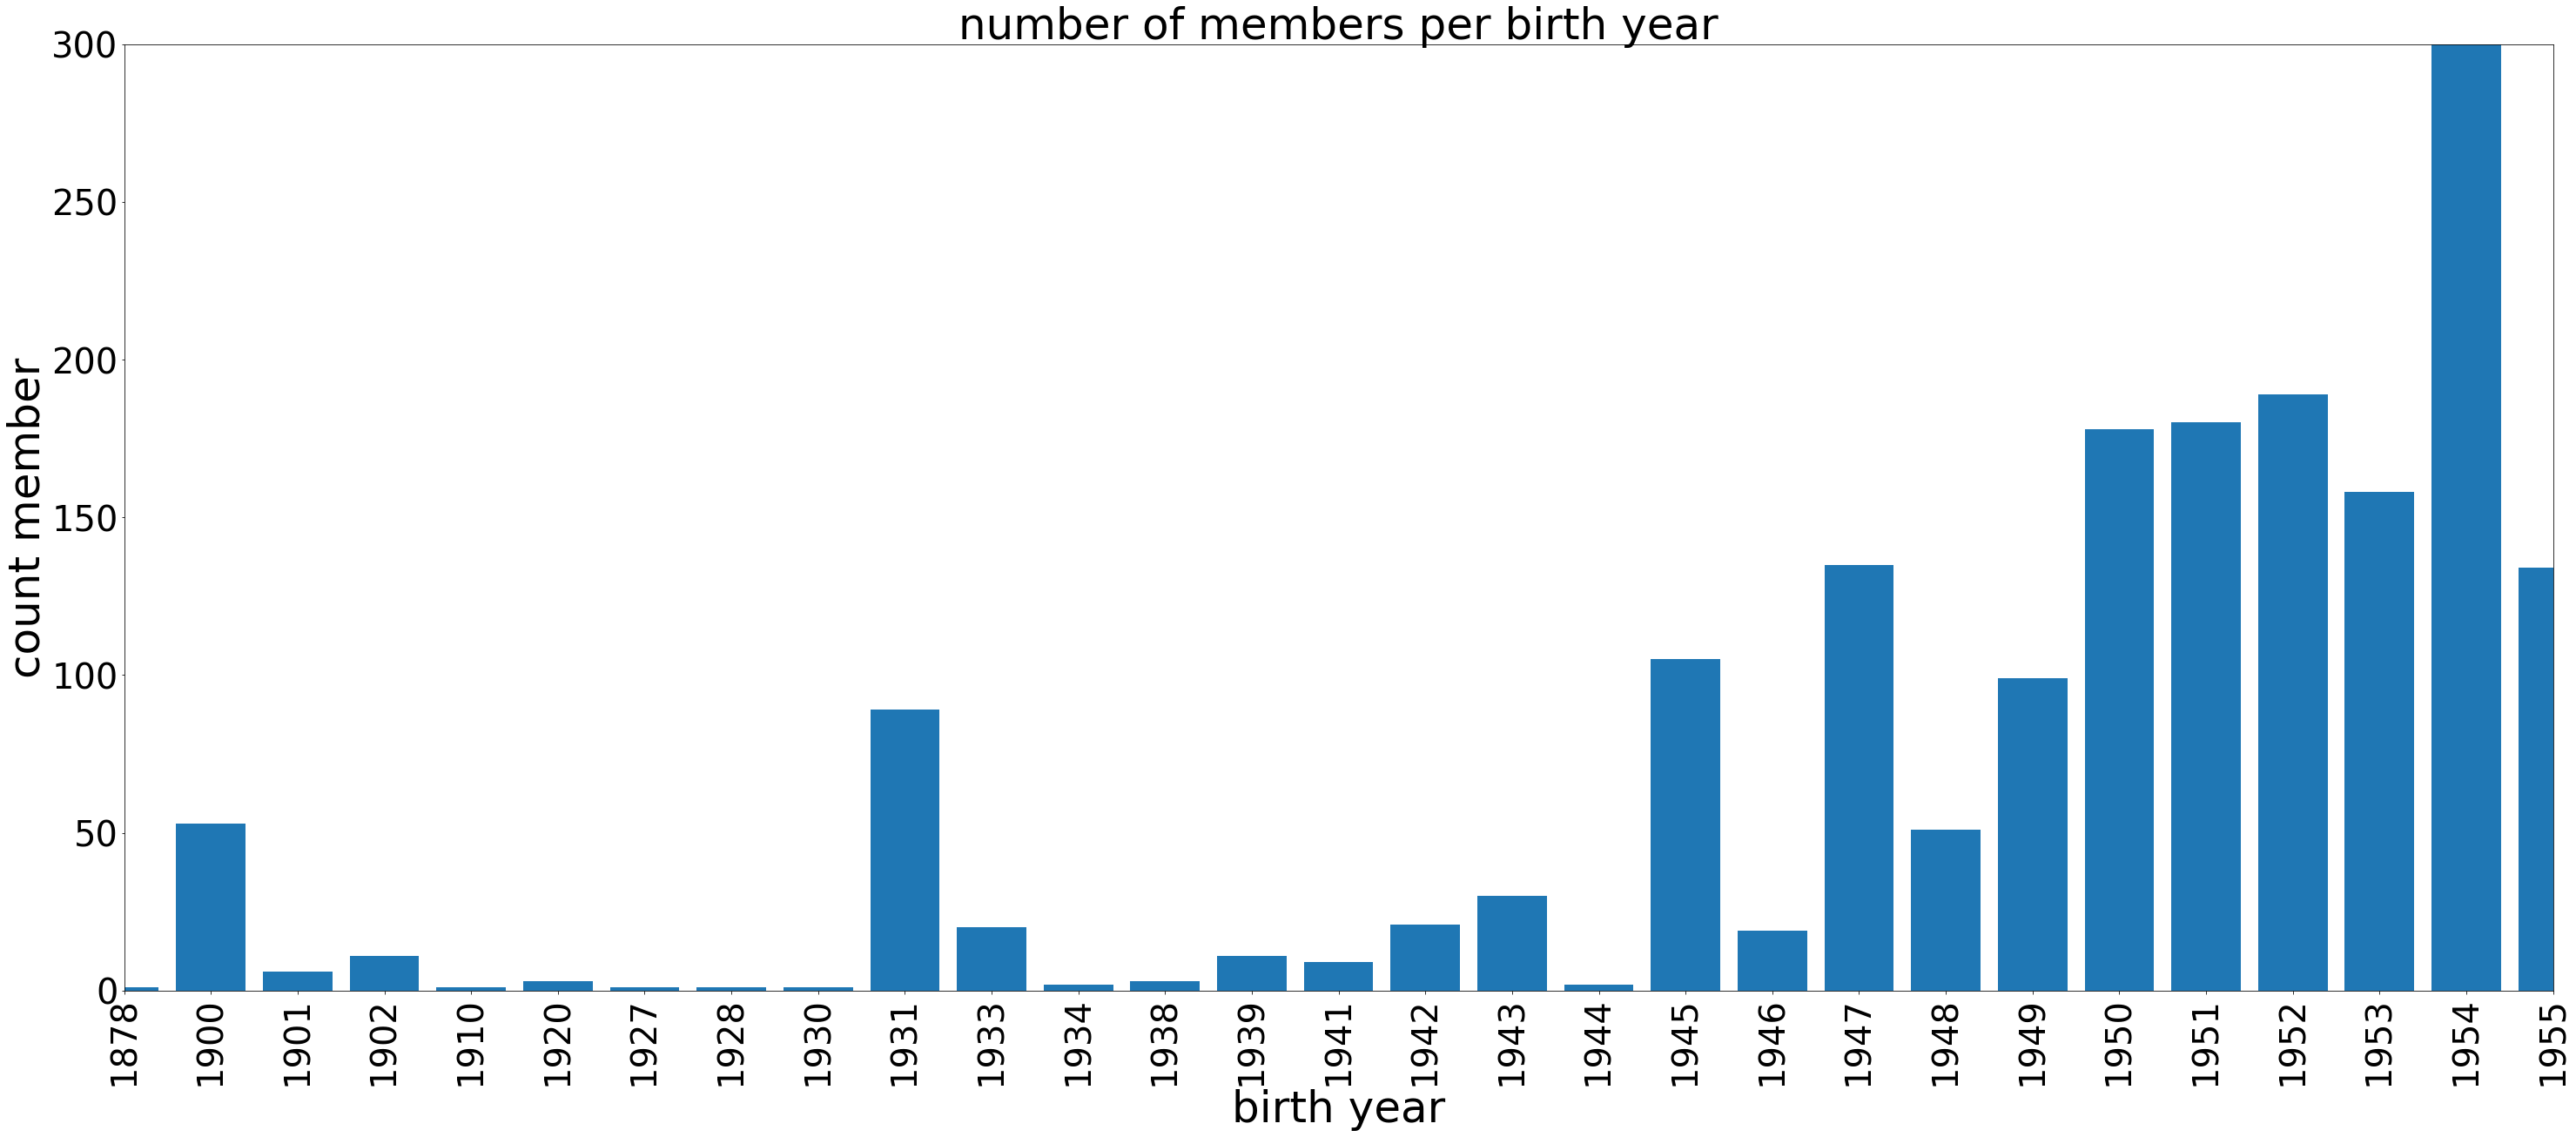

In [58]:
x=df.member_birth_year.value_counts().index
y=df.member_birth_year.value_counts().values
plt.figure(figsize=(50,20))
plt.bar(x,y)
plt.xlim(1878, 1955)
plt.ylim(0,300)

plot_func_2 (plt, 'birth year', 'count member', 'number of members per birth year')


#### Closer look to the half right side of the graph

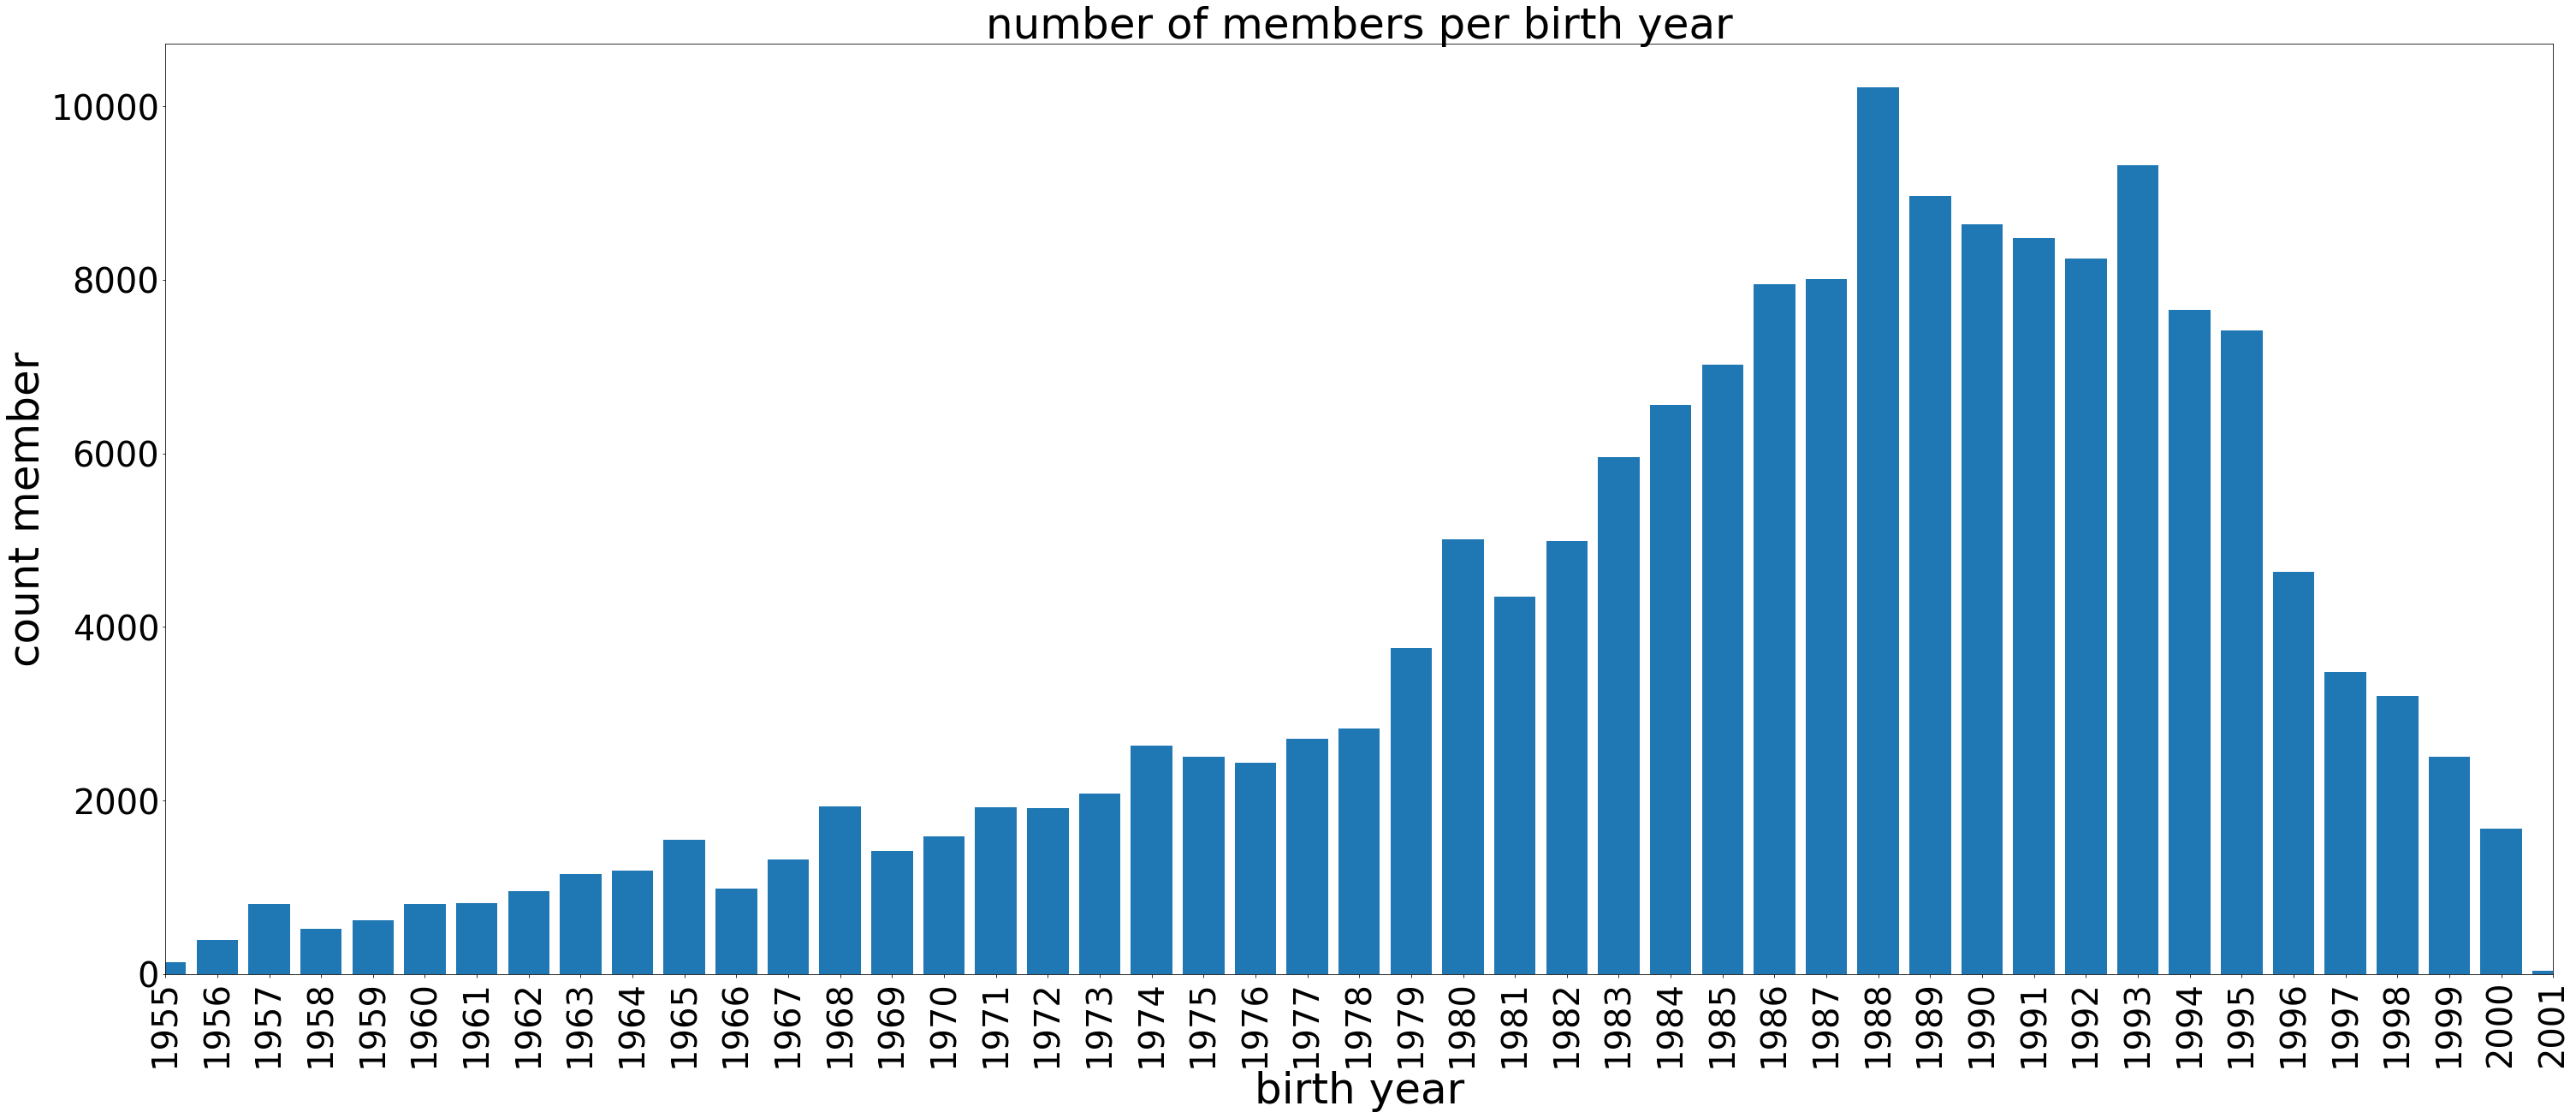

In [59]:
x=df.member_birth_year.value_counts().index
y=df.member_birth_year.value_counts().values

plt.figure(figsize=(50,20))
plt.bar(x,y)
plt.xlim(1955, 2001)
plot_func_2 (plt, 'birth year', 'count member', 'number of members per birth year')


>### Observation 4: 
>> The visualization 4 shows that most of members are less than 64 years old. members born in 1988 and around are the biggest part of total members. Therefore, more recent is the birth year, higher the number of members gets.

### Question 5: How many members by gender?

> ### Visualization 5:

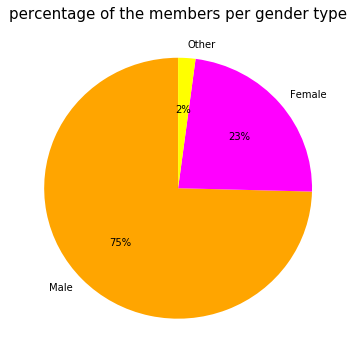

In [60]:
plt.figure(figsize=(6, 6))
gender_count=df.member_gender.value_counts()
plt.pie(gender_count, labels=gender_count.index, startangle = 90, autopct='%1.0f%%', colors = ['orange','magenta','yellow'])
plt.title('percentage of the members per gender type', fontsize=15)
plt.show()

>### Observation 5:
>> The visualization 5 shows that 75% of the total members is male and 23% of the total members is composed of female.

### Question 6: percentage of subscribers and customers?

### Visualization 6

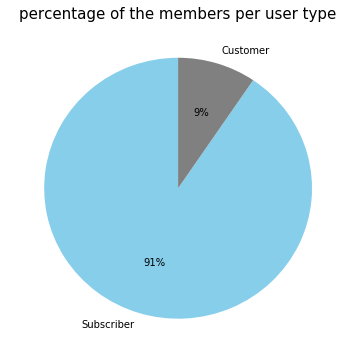

In [61]:
plt.figure(figsize=(6, 6))
user_type=df.user_type.value_counts()
plt.pie(user_type, labels=user_type.index, startangle = 90, autopct='%1.0f%%', colors = ['skyblue','gray'])
plt.title('percentage of the members per user type', fontsize=15)
plt.show()

> ### Observation 6:
>> The visualization 6 shows that 91% of total members are subscribers and 9% are Customers

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> 
- drop rows having any null value
- drop duplicated entries
- changed the type of start_time and end_time columns to datetime
- changed the type of start_station_id and _station_id columns to int then str
- changed the type of bike_id to str
- Extract hour, week day from start_time and end_time columns
- Created columns containing the difference of latitude and difference of longitude for each row

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> In order to better investigate the data, some operations has been performed to get the data tidy:
- drop rows having any null value
- drop duplicated entries
- changed the type of start_time and end_time columns to datetime
- changed the type of start_station_id and _station_id columns to int then str
- changed the type of bike_id to str
- Extracted hour, week day from start_time and end_time columns
- Created columns containing the difference of latitude and difference of longitude for each row



## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Question 7: How correlated are the difference in latitude and the duration of the trip?

### Visualization 7

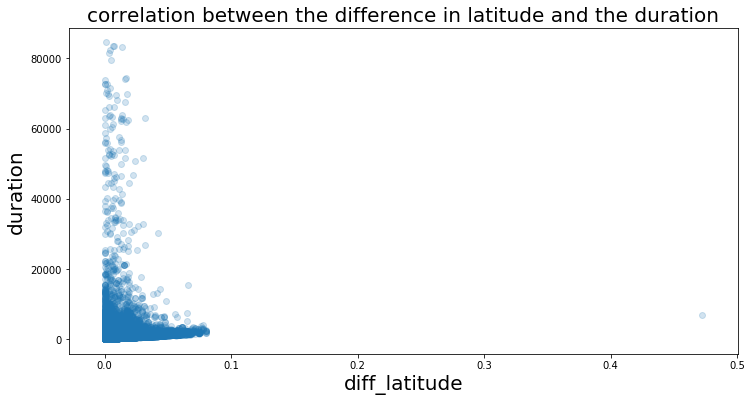

In [62]:
x=df.diff_latitude
y=df.duration_sec
fig= plt.figure( figsize=(12,6))
plt.scatter(x,y, alpha=0.2)

plot_func(plt, 'diff_latitude', 'duration', 'correlation between the difference in latitude and the duration')


In [63]:
# calculate the correlation coefficient
np.corrcoef(x,y)

array([[ 1.        ,  0.10977515],
       [ 0.10977515,  1.        ]])

> ### Observation 7:
>> The Visualization shows that the difference in latitude and the duration of the trip are weakly correlated. The correlation coefficent 0.11 confirms that.


### Question 8: How correlated are the difference in longitude and the duration of the trip?

### Visualization 8

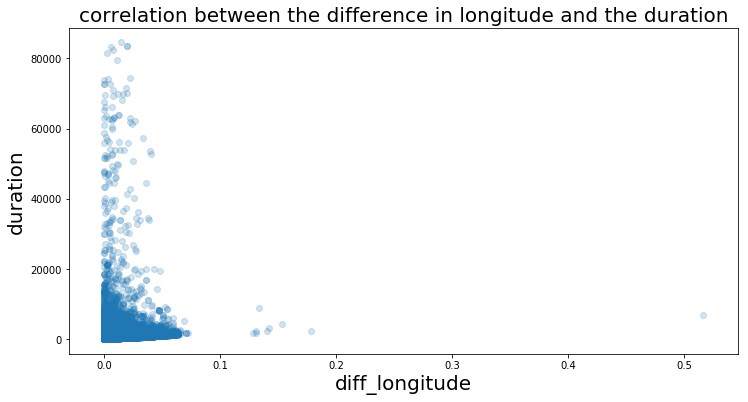

In [64]:
x=df.diff_longitude
y=df.duration_sec
fig= plt.figure( figsize=(12,6))
plt.scatter(x,y, alpha=0.2)
plot_func(plt, 'diff_longitude', 'duration', 'correlation between the difference in longitude and the duration')


In [65]:
# calculate the correlation coefficient
np.corrcoef(x,y)

array([[ 1.        ,  0.09690961],
       [ 0.09690961,  1.        ]])

>### Observation 8:
>> The Visualization 8 shows that the difference in longitude and the duration of the trip are weakly correlated. The correlation coefficent 0.1 confirms that.

### Question 9: How do the number of members vary per birth year?


### Visualization 9:

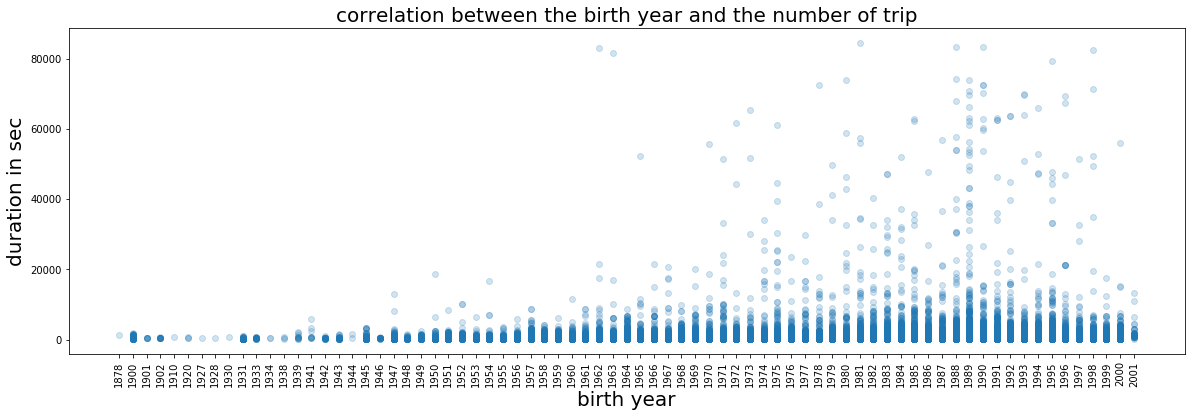

In [66]:
x=df.member_birth_year
y=df.duration_sec

fig= plt.figure( figsize=(20,6))
plt.scatter(x,y, alpha=0.2)
plt.xticks(rotation='vertical')
plot_func(plt, 'birth year', 'duration in sec', 'correlation between the birth year and the number of trip')


> ### Observation 9:
>> The visualization 9 shows that members being less than 60 years old spend more time in trip that the olders. The more recent the birth year, higher the duration of the trip gets.

### Question 10: How are data shaped according to duration per member gender?

> ### Visualization 10:

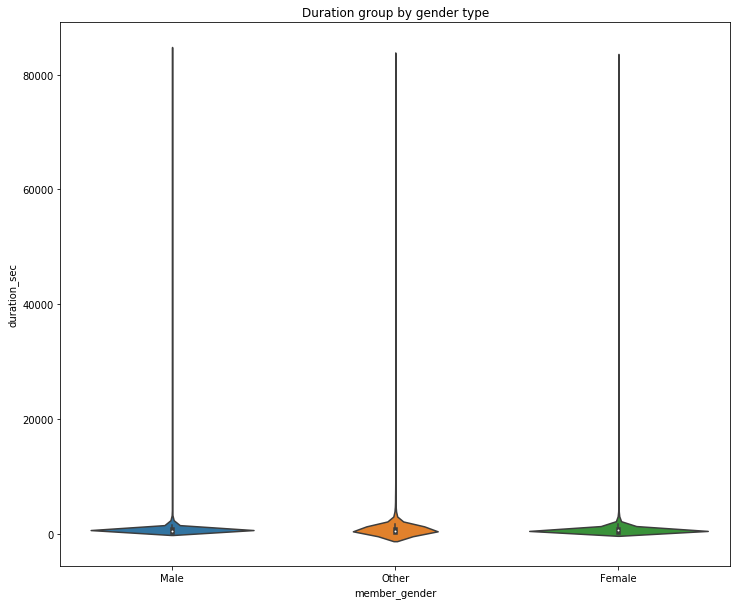

In [67]:
plt.figure(figsize=(12, 10))
ax=sb.violinplot(data=df, x='member_gender', y='duration_sec' )
plt.title('Duration group by gender type')
plt.show()

> ### Observation 10:
>> The visualization 10 shows that the mean duration of each gender type is contained between 500 seconds and 800 seconds. However most of male take faster than other female which takes faster than other gender. 

### Question 11:  How are data shaped according to duration per user type?

> ### Visualization 11:

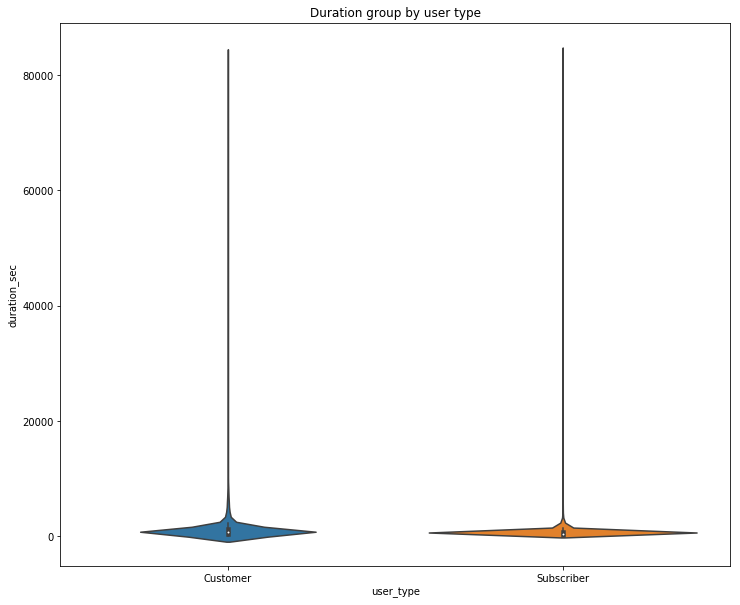

In [68]:
plt.figure(figsize=(12, 10))
ax=sb.violinplot(data=df, x='user_type', y='duration_sec' )
plt.title('Duration group by user type')
plt.show()

> ### Observation 11:
>> The visualization 11 shows that the mean duration of custumer is higher than the mean duration of subscriber. 

### Question 12: What is the number of members grouped by member gender and user type?

> ### Visualization 12:

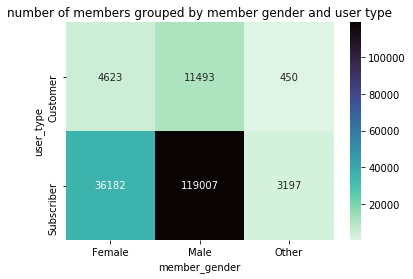

In [69]:
df_group=df.groupby(['member_gender', 'user_type']).size()

df_group=df_group.reset_index(name='count')

df_group=df_group.pivot(index = 'user_type', columns = 'member_gender', values = 'count')

sb.heatmap(df_group, annot = True, fmt = 'd', cmap='mako_r')

plt.title('number of members grouped by member gender and user type')
plt.show()

> ### Odservation 12:
>> The visualization 12 shows that the number of male subscribers is higher than the number of female subscribers, wich is higher than other gender and we make the same observation for the number of custumers per gender.  

### Question 13: What is the number of members grouped by if the bike_share_for_all_trip and user type?

> ### Visualization 13:

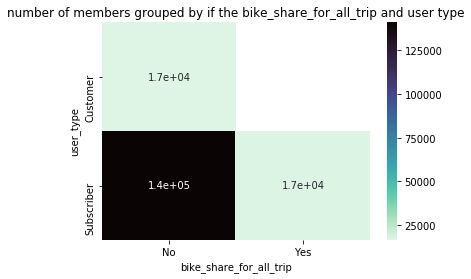

In [70]:
df_group=df.groupby(['bike_share_for_all_trip','user_type']).size()

df_group=df_group.reset_index(name='count')

df_group=df_group.pivot(index = 'user_type', columns = 'bike_share_for_all_trip', values = 'count')

sb.heatmap(df_group, annot = True, cmap='mako_r')
plt.title('number of members grouped by if the bike_share_for_all_trip and user type')

plt.show()

> ### Observation 13:
>> The visualisation 13 shows that only the subscribers have the possibility to make bike share for all trip. However the number of subscriber having not bike share for all trip is higher than the number of customer having not bike share for all trip.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

 In this part of the investigation, we observed that:
 - the difference in latitude doesn't impact the duration of the trip 
 - the difference in longitude doesn't impact the duration of the trip 
 - members being less than 60 years old spend more time in trip that the olders. The more recent the birth year, higher the duration of the trip gets.
 - the mean duration of each gender type is contained between 500 seconds and 800 seconds. However most of male take faster than other female which takes faster than other gender.
 - the mean duration of custumer is higher than the mean duration of subscriber and same for customer. 
 - We assume that only the subscribers have the possibility to make bike share for all trip

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
- There is not any interesting relationships found between the other features in the framework of this investigation.

## Multivariate Exploration

### Question 14: What is the number of subscribers and customers per birth year?

> ### Visualization 14: 

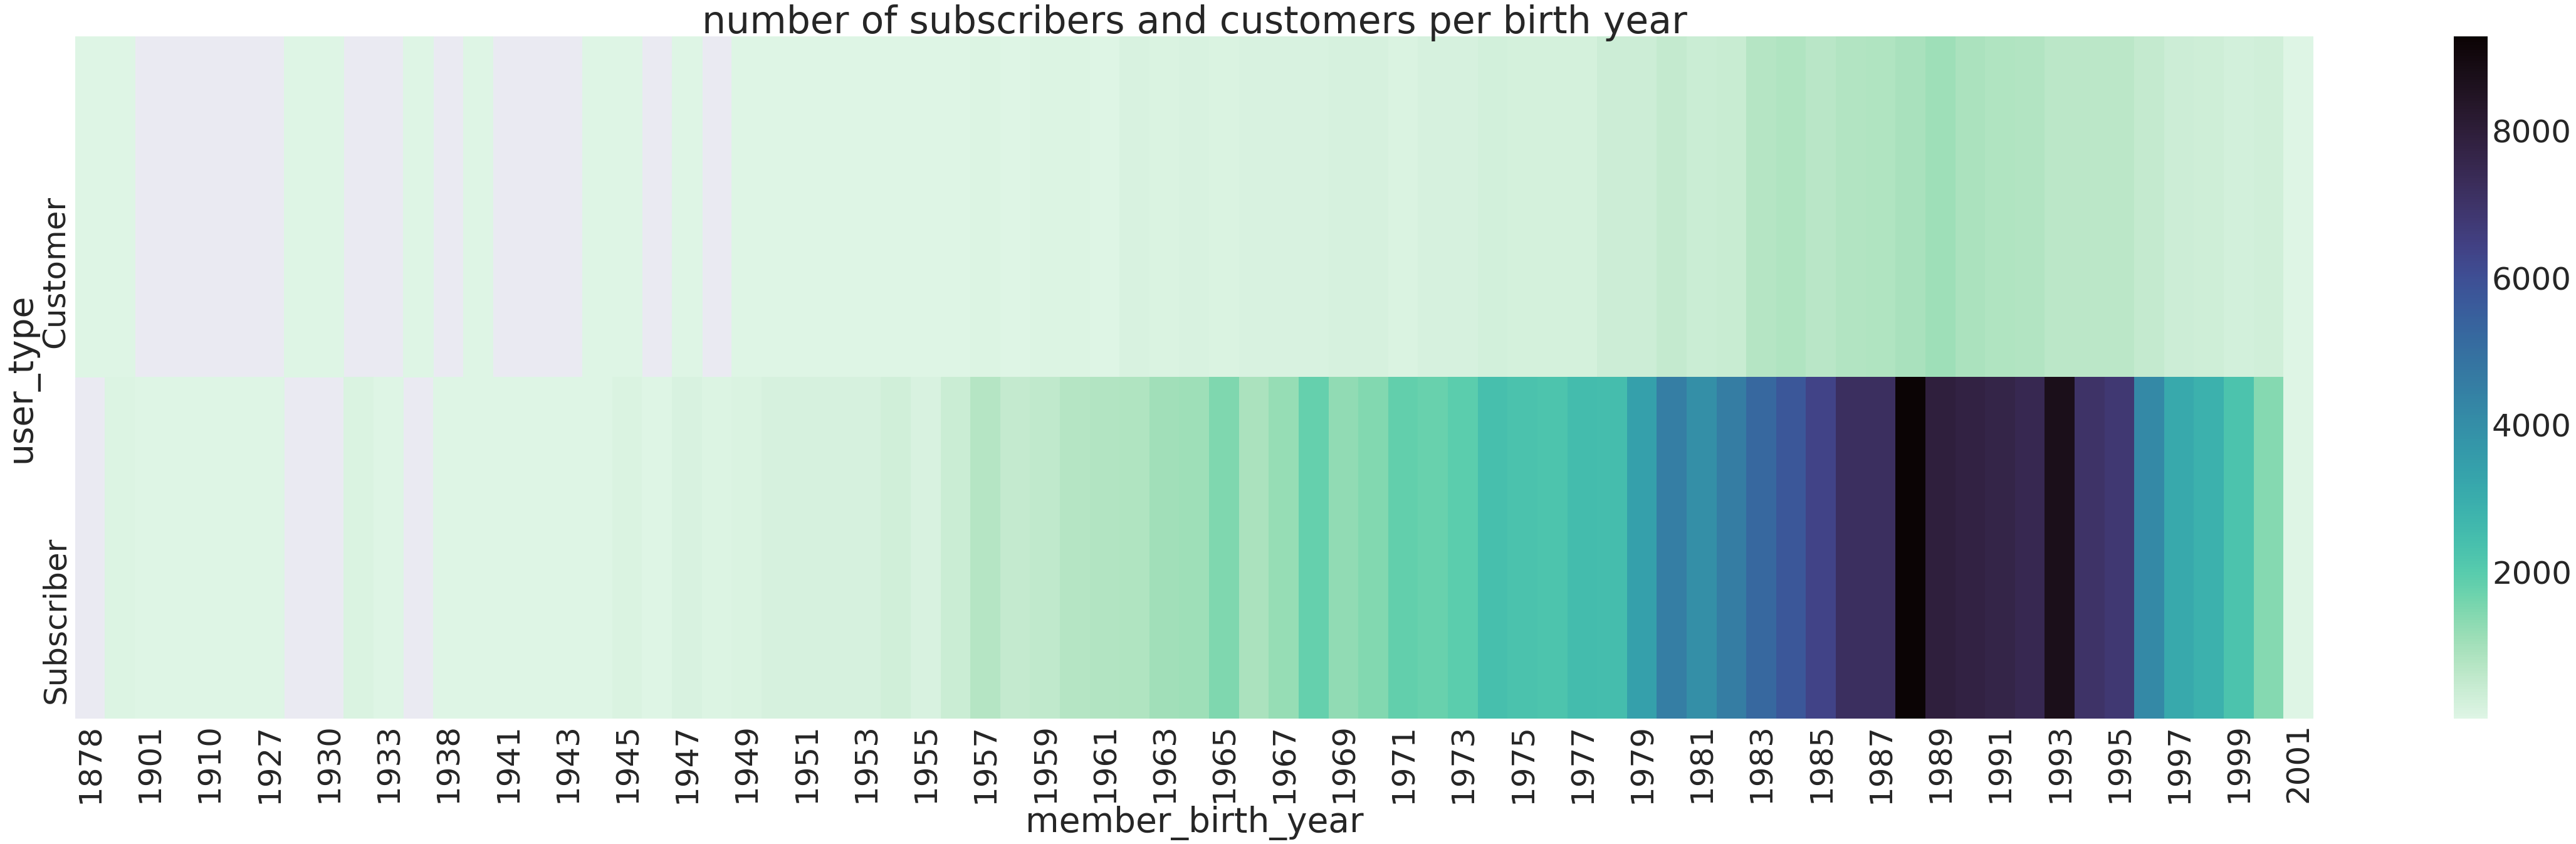

In [71]:
df_group=df.groupby(['user_type','member_birth_year']).size()

df_group=df_group.reset_index(name='count')

df_group=df_group.pivot(index = 'user_type', columns = 'member_birth_year', values = 'count')

plt.figure(figsize=(80,20))

sb.set(font_scale= 5 )

sb.heatmap(df_group, cmap='mako_r')
plt.title('number of subscribers and customers per birth year')

plt.show()

> ### Observation 14:
>> The visualization 13 shows that most of the subscribers are born after 1973 and most of customers are born after 1983.

### Question 15: Which are the most used start stations by customers and subscribers? 

> ### Visualisation 15:

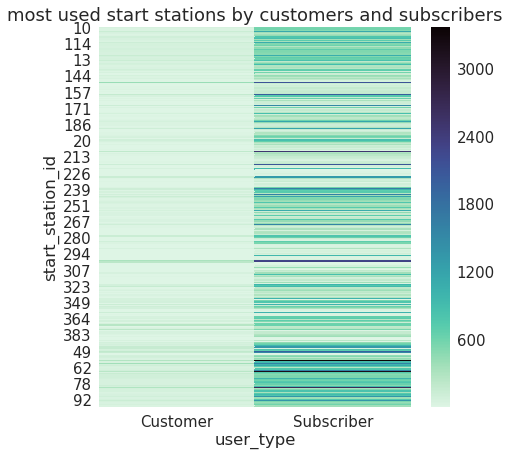

In [73]:
df_group=df.groupby(['start_station_id','user_type']).size()

df_group=df_group.reset_index(name='count')

df_group=df_group.pivot(index = 'start_station_id', columns = 'user_type', values = 'count')

plt.figure(figsize=(7,7))

sb.set(font_scale= 1.5 )

sb.heatmap(df_group, cmap='mako_r')
plt.title('most used start stations by customers and subscribers')

plt.show()

> ### Observation 15:
>> The visualization 15 shows that the most used start stations are those with id: 3, 18, 33, 51, 67, 85, 238.

### Question 16: Which are the most used end stations by customers and subscribers?

> ### Visualisation 16:

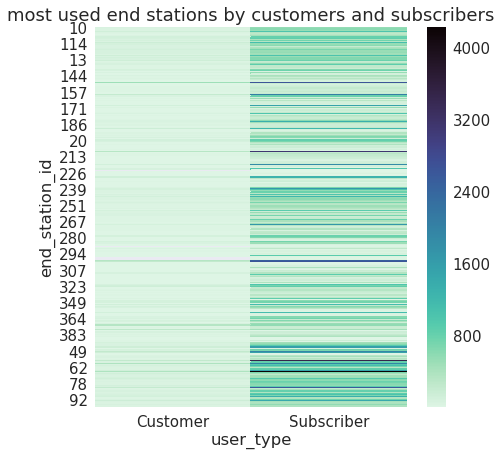

In [74]:
df_group=df.groupby(['end_station_id','user_type']).size()

df_group=df_group.reset_index(name='count')

df_group=df_group.pivot(index = 'end_station_id', columns = 'user_type', values = 'count')

plt.figure(figsize=(7,7))

sb.set(font_scale= 1.5 )

sb.heatmap(df_group, cmap='mako_r')
plt.title('most used end stations by customers and subscribers')

plt.show()

> ### Observation 16:
>> The visualization 16 shows that the most used end stations are those with id : 3, 18, 33, 51, 67, 85, 238.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
In this part of the investigation, we observe that:
- most of the subscribers are born after 1973 and most of customers are born after 1983.
- the most used start stations are those with id: 3, 18, 33, 51, 67, 85, 238 for subscribers and 299 for customers.
- the most used end stations are those with id : 3, 18, 33, 51, 67, 85, 238 for subscribers and 299 for customers. 

### Were there any interesting or surprising interactions between features?
There is no surprising interactions found between features in this part apart from those mentioned above.

## Conclusions

> During the univariate exploration we observed that:
- the highest number of trip are registered during working days and less during weedend
- most trips start at 8 O'clock and 17 O'clock
- most trips end at 8 O'clock and 17 O'clock
- The most used start station is 'Market St at 10th St' 
- the station from where users have started the least is 16th St Depot.
- most of members are less than 64 years old. members born in 1988 and around are the biggest part of total members. Therefore, more recent is the birth year, higher the number of members gets.
- 75% of the total members is male and 23% of the total members is composed of female.
- 91% of total members are subscribers and 9% are Customers

> During the bivariate exploration, we observed that:
 - the difference in latitude doesn't impact the duration of the trip 
 - the difference in longitude doesn't impact the duration of the trip 
 - members being less than 60 years old spend more time in trip that the olders. The more recent the birth year, higher the duration of the trip gets.
 - the mean duration of each gender type is contained between 500 seconds and 800 seconds. However most of male take faster than other female which takes faster than other gender.
 - the mean duration of customer is higher than the mean duration of subscriber and same for customer. 
 - We assume that only the subscribers have the possibility to make bike share for all trip
 
> During the multivariate exploration, we observed that:
- most of the subscribers are born after 1973 and most of customers are born after 1983.
- the most used start stations are those with id: 3, 18, 33, 51, 67, 85, 238 for subscribers and 299 for customers.
- the most used end stations are those with id : 3, 18, 33, 51, 67, 85, 238 for subscribers and 299 for customers.

